# PE EVALUABLE: NBA

Vamos a aplicar los contenidos aprendidos tratando un caso real, los datos de la NBA de 2022-2023. En este sentido yo voy a proponer diferentes preguntas, pero tenéis total libertad para hacer el análisis que considereis oportuno siempre y cuando se trabajane las diferentes correlaciones.

En todos los casos, partiremos de nuestros datos para despúes a través de neustros conocimientos de distribuciones realitzar los cálculos de manera inferencial.

## A1: Anàlisis del DataSet

Vamos a utilizar el dataSet https://www.nbastuffer.com/2023-2024-nba-player-stats/:

* Solo queremos jugadores titulares (más de 25min pp) y que hayan dispustado màs de 10 partidos ¿De cuántos jugadores tenemos datos?
* Para nuestro anàlisis no nos interesan todas las columnas. Nos quedaremos únicamente con Nombre, Equipo, Edad, Posición Partidos Jugados, Minutos por partido, Media de puntos, Media rebotes, Media de Pèrdidas, %TL anotados


In [50]:
import pandas as pd
df_nba = pd.read_csv("NBA_Stats.csv")
df_nba = df_nba[(df_nba['MPG'] > 25) & (df_nba['GP'] > 10)]
df_nba.describe()
df_nba = df_nba[["NAME","TEAM","POS","AGE","GP","MPG","PPG","RPG","TPG", "FT%"]]
df_nba.head()

,NAME,TEAM,POS,AGE,GP,MPG,PPG,RPG,TPG,FT%
0,Giannis Antetokounmpo,Mil,F,30.1,32,35.0,31.5,11.9,3.5,0.588
1,Shai Gilgeous-Alexander,Okc,G,26.5,39,34.4,31.4,5.5,2.7,0.895
2,Nikola Jokic,Den,C,29.9,34,36.9,30.6,13.2,3.1,0.800
3,LaMelo Ball,Cha,G,23.4,25,34.0,29.7,5.4,3.9,0.833
5,Luka Doncic,Dal,F-G,25.9,22,35.7,28.1,8.3,3.4,0.767


## A2: Anàlisis de la Edad

No nos vamos a centrar únicamente en nuestro caso de jugadores, sino que obtendremos estadísiticos básicos para poder realizar cálculo inferencial

Tenemos la sensación de que los jugadores cada vez juegan más años, así que que queremos responder a las siguientes preguntas:

* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad inferior a 23 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad superior a 34 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad entre 28 a 32 años?
* ¿Cuál es la edad a partir de la qual el 90% de los jugadores son menores?


In [51]:
from scipy.stats import norm

# a) Probabilidad de que un jugador tenga menos de 23 años
mean = df_nba["AGE"].mean()         # Media
std_dev = df_nba["AGE"].std()       # Desviación estándar
x = 23                              # Tamaño de la muestra
prob_edad_inferior_23 = norm.cdf(x, loc=mean, scale=std_dev)

# b) Probabilidad de que un jugador tenga más de 34 años
mean = df_nba["AGE"].mean()
std_dev = df_nba["AGE"].std()
x = 34
prob_edad_mayor_34 = 1 - norm.cdf(x, loc=mean, scale=std_dev)

# c) Probabilidad de que un jugador tenga entre 28 a 32 años
mean = df_nba["AGE"].mean()
std_dev = df_nba["AGE"].std()
x = 34
prob_entre_28_32 = 1 - norm.cdf(x, loc=mean, scale=std_dev)

# d) Edad a partir de la qual el 90% jugadores son menores
mean = df_nba["AGE"].mean()
std_dev = df_nba["AGE"].std()
x = 0.9
edad_90_percentil = norm.ppf(x, loc=mean, scale=std_dev)


print(f'Prob jugador inferior a 23 años: {prob_edad_inferior_23}')
print(f'Prob jugador mayor a 23 años: {prob_edad_mayor_34}')
print(f'Prob jugador entre 28 a 32 años: {prob_entre_28_32}')
print(f'Edad a partir de la cual el 90% de los jugadores son menores: {edad_90_percentil}')

Prob jugador inferior a 23 años: 0.1540710001553277
Prob jugador mayor a 23 años: 0.06770606264513801
Prob jugador entre 28 a 32 años: 0.06770606264513801
Edad a partir de la cual el 90% de los jugadores son menores: 33.07373472669041


Con nuestros datos obervacionales: 

* Muestra un gràfico BoxPlot diferenciando entre Centers i Guards, y haz una reflexión sobre sus medias y su dispersión.

* El Sentido común me dice que cuanta más edad mayor restricción de minutos, eso se cumple, existe una correlación entre esas dos variables?

<Figure size 600x400 with 0 Axes>

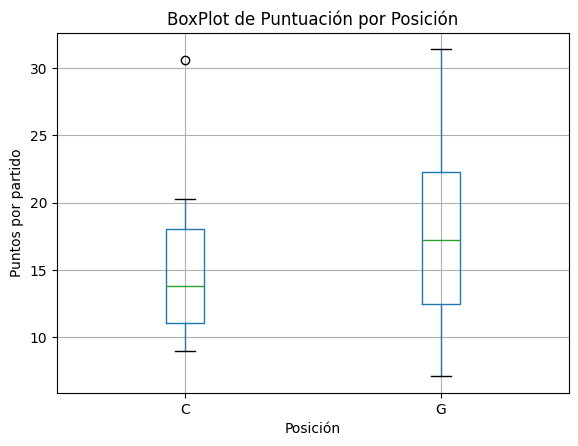

Correlación entre AGE y MPG: 0.10172243683933657


In [52]:
import matplotlib.pyplot as plt

df_filtered = df_nba[df_nba["POS"].isin(["C", "G"])]

plt.figure(figsize=(6,4))
df_filtered.boxplot(column="PPG", by="POS")
plt.title("BoxPlot de Puntuación por Posición")
plt.suptitle("")
plt.xlabel("Posición")
plt.ylabel("Puntos por partido")
plt.show()

# Reflexión:
# Los Guards (G) tienen una media de puntuación más alta y una mayor dispersión, lo que refleja su rol ofensivo y variabilidad en el rendimiento.
# Los Centers (C) muestran menor dispersión y una media más baja, indicando un desempeño más consistente pero menos destacado en la anotación.


corr_age_mpg = df_nba["AGE"].corr(df_nba["MPG"])
print(f"Correlación entre AGE y MPG: {corr_age_mpg}")

# Reflexión:
# La edad no parece ser un factor significativo en la restricción de minutos porque la correlación entre la edad y los minutos por partido es muy baja (0.1)

## A2: Triples de Lebron

Parece que este año lebron  está bastante acertado en el triple. Suponiendo que tirara 5 triples por partido, responde a las siguientes preguntas:

* ¿Cuál es la probabilidad de que no meta ninguno?
* ¿Cuál es la probabilidad de que los meta todos?

In [53]:

from scipy.stats import binom, poisson
from nba_api.stats.endpoints import playercareerstats

lebron_id = 2544

lebron_career = playercareerstats.PlayerCareerStats(player_id=lebron_id)
career_stats = lebron_career.get_data_frames()[0]

current_season_stats = career_stats[career_stats['SEASON_ID'] == '2024-25']

# Obtener el porcentaje de triples
p = current_season_stats['FG3_PCT'].values[0]
print(f"Porcentaje de triples de LeBron: {p:.2%}")

n = 5
prob_ninguno = binom.pmf(0, n, p)
prob_todos = binom.pmf(n, n, p)

print(f'Prob no meter ninguno: {prob_ninguno:%}')
print(f'Prob meter todos: {prob_todos:%}')


Porcentaje de triples de LeBron: 39.80%
Prob no meter ninguno: 7.906467%
Prob meter todos: 0.998655%



Muestra su función de distribución acumulada empírica y responde las siguientes preguntas:

* ¿Cuál es la probabilidad de que meta uno o menos? (Partido de poco acierto)
* ¿Cuál es la probabilidad de que meta tres o màs? (Partido de mucho acierto)

In [54]:
prob_uno_o_menos = binom.cdf(1, n, p)
prob_tres_o_mas = 1 - binom.cdf(2, n, p)

print(f'Prob uno o menos: {prob_uno_o_menos:%}')
print(f'Prob tres o mas: {prob_tres_o_mas:%}')

Prob uno o menos: 34.042462%
Prob tres o mas: 31.398980%


## A3 Picadas de Lebron tirando triples

Para hacer este apartado necesitamos el número de triples que se ha tirado lebron en cada partido. Tienes dos opciones:
* Dummy: Mirarlo manualmente y crear un array a mano
* Upgrade: Llamar a la api https://www.balldontlie.io/ (Stats) y obtener los datos



Muestra en un histograma los triples lanzados por lebron, en cuàntos partidos ha lanzado 5 o más?

D:\Temp\ipykernel_5456\2412426309.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_log_df['GAME_DATE'] = pd.to_datetime(game_log_df['GAME_DATE'])


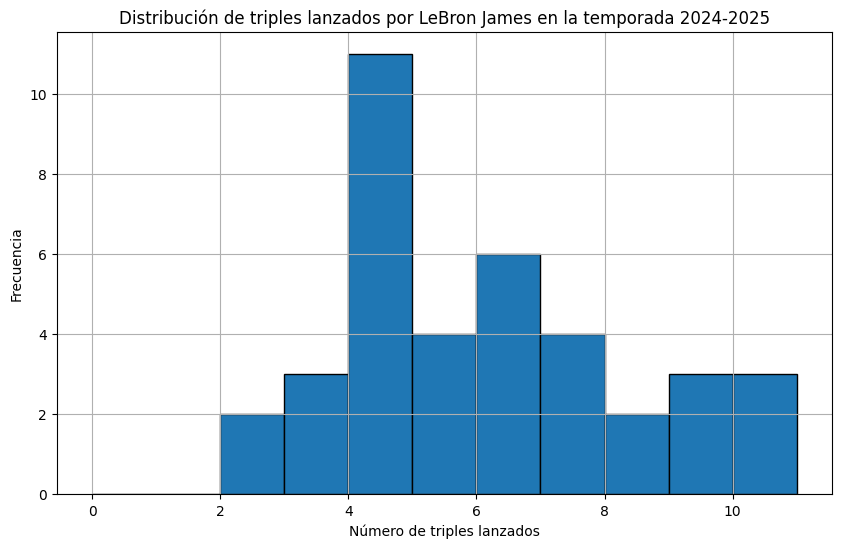

In [55]:
from nba_api.stats.endpoints import playergamelog

game_log = playergamelog.PlayerGameLog(player_id=lebron_id, season='2024-25')
game_log_df = game_log.get_data_frames()[0]

# cogemos solo la fecha y los triples realizados
game_log_df = game_log_df[['GAME_DATE', 'FG3A']]

# Convertir la columna 'GAME_DATE' a formato datetime
game_log_df['GAME_DATE'] = pd.to_datetime(game_log_df['GAME_DATE'])
# Ordenar por fecha
game_log_df = game_log_df.sort_values('GAME_DATE')

plt.figure(figsize=(10, 6))
plt.hist(game_log_df['FG3A'], bins=range(0, int(game_log_df['FG3A'].max()) + 1, 1), edgecolor='black')
plt.title('Distribución de triples lanzados por LeBron James en la temporada 2024-2025')
plt.xlabel('Número de triples lanzados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

A partir de estos datos, vamos a hacer cálculo inferencial imaginando que juega infinitos partidos. Respondemos a la siguientes preguntas:

* ¿Cuál es la probabilidad de que lebron se tire 5 o más triples por partido?
* Como entrenador le he recomendado que tire 3 triples por partido, ¿cuál es la probabilidad de que eso suceda?

In [56]:
from nba_api.stats.endpoints import leagueleaders
from scipy.stats import norm
import numpy as np

# Paso 1: Obtener el porcentaje promedio de triples de los jugadores
leaders = leagueleaders.LeagueLeaders()
leaders_df = leaders.get_data_frames()[0]

# Calcular el promedio de FG3_PCT (porcentaje de triples)
average_3p_percentage = leaders_df["FG3_PCT"].mean()
p = average_3p_percentage  # Probabilidad de éxito en un intento

# Paso 2: Aproximar la distribución binomial con una normal
n = 5  # Número de intentos en un partido
mu = n * p  # Media
sigma = np.sqrt(n * p * (1 - p))  # Desviación estándar

# Paso 3: Calcular probabilidades con la distribución normal

# a) Probabilidad de que tire 5 o más triples (P(X >= 5))
prob_tira_5_o_mas = 1 - norm.cdf(5, mu, sigma)

# b) Probabilidad de que tire exactamente 3 triples (P(X = 3)) - Aproximación
# Usamos la aproximación de la normal y calculamos la probabilidad en el rango [2.5, 3.5]
prob_tira_3 = norm.cdf(3.5, mu, sigma) - norm.cdf(2.5, mu, sigma)

# Mostrar resultados
print(f"Probabilidad de que tire 5 o más triples (usando normal): {prob_tira_5_o_mas:.2%}")
print(f"Probabilidad de que tire exactamente 3 triples (usando normal): {prob_tira_3:.2%}")


Probabilidad de que tire 5 o más triples (usando normal): 0.03%
Probabilidad de que tire exactamente 3 triples (usando normal): 13.55%


## A4 Tiempo entre lanzamiento

Lebron se tira un triple en promedio cada 12 minutos jugados en pista. Responde las siguientes preguntas:

* ¿Cuál és la probabilidad de que pase màs de 20 min sin tirarse un triple?
* ¿Cuál és la probabilidad de que se tire un triple entre el min 8 y 15min después del lanzamiento de triple anterior?

In [57]:
import numpy as np
from scipy.stats import expon

# Tasa de ocurrencia (lambda) en minutos
lambda_ = 1 / 12  # Un triple cada 12 minutos en promedio

# 1. Probabilidad de que pase más de 20 minutos sin tirarse un triple
prob_mas_20_min = expon.sf(20, scale=1/lambda_)

# 2. Probabilidad de que se tire un triple entre el minuto 8 y 15
prob_entre_8_y_15 = expon.cdf(15, scale=1/lambda_) - expon.cdf(8, scale=1/lambda_)

# Mostrar los resultados
print(f"Probabilidad de que pase más de 20 minutos sin tirarse un triple: {prob_mas_20_min:.2%}")
print(f"Probabilidad de que se tire un triple entre el minuto 8 y 15: {prob_entre_8_y_15:.2%}")


Probabilidad de que pase más de 20 minutos sin tirarse un triple: 18.89%
Probabilidad de que se tire un triple entre el minuto 8 y 15: 22.69%
